# System Identification Benchmarking

In [78]:
import pandas as pd
from scipy.optimize import curve_fit
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [108]:
%autoreload

In [80]:
from codebase.data_generation import *
from codebase.sparse_regression import *
from codebase.utils import *

## EEG Response

In [81]:
data = loadmat('C:/Users/kipr/Downloads/Benchmark_EEG_small/Benchmark_EEG_small.mat')
u, y, readme = data['data'][0][0]
str(readme)

'[\'This data accompanies the IEEE TNSRE paper "Modeling the nonlinear cortical response in EEG evoked by wrist joint manipulation". The input (u) and output (y) are matrices with dimensions [#participants, #realizations[M], #samples[N]. The data has been averaged and downsampled (Section II-B). The data has also been scaled and a time delay has been imposed (Section II-G)\']'

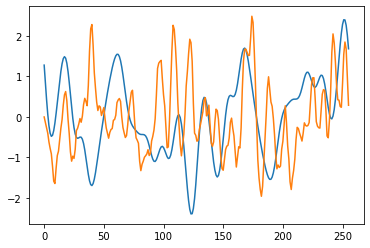

In [82]:
sample = 0
participant = 0

plt.plot(u[participant, sample])
plt.plot(y[participant, sample])

In [116]:
participant = 0

targets, X = [], []

for inp, outp in zip(u[participant], y[participant]):
    targets.extend(outp[1:])
    X.extend(np.c_[inp[:-1]])
#     X.extend(np.c_[inp[:-1], outp[:-1]])

targets, X = np.array(targets).reshape(-1, 1), np.array(X)

In [122]:
augmented, _ = make_polynomials(X, max_degree=7)

weights, _ = sparse_regression(augmented, targets, cutoff=1e-4)

show_weights(weights, variables=['u', 'y'])

| function   |   $u_{k+1}$ |
|:-----------|------------:|
| $1$        | -0.245018   |
| $ u$       |  0.118885   |
| $ y$       |  0.186974   |
| $ u^2$     | -0.0750726  |
| $ u y$     |  0.0681427  |
| $ y^2$     |  0.0505489  |
| $ u^3$     | -0.0123685  |
| $ u^2 y$   | -0.00705787 |

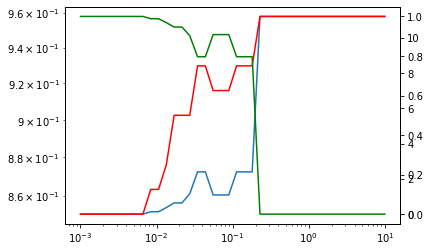

In [124]:
def vaf(targets, predicted):
    return 100*(1-np.var(targets - predicted)/np.var(targets))

result = cutoff_mses(augmented, targets, -3, 1, custom_metric=vaf)

fig, ax = plt.subplots()
ax.plot(result['cutoffs'], result['mses'])
ax.set_xscale('log')
ax.set_yscale('log')
ax2= ax.twinx()
ax2.plot(result['cutoffs'], result['sparsity'], 'r')
ax3= ax.twinx()
ax3.plot(result['cutoffs'], result['custom_metric'], 'g')


### Evaluation

In [107]:


vaf(targets, augmented @ weights)

84.64785665842615

## Silverbox

In [126]:
data = loadmat('C:/Users/kipr/Downloads/SilverboxFiles/SilverboxFiles/Schroeder80mV.mat')

data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Ovld2', 'Ovld1', 'V1', 'V2'])